In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import timedelta, date

In [2]:
# Import files & important dates

btc = pd.read_csv(r"/Users/n/Downloads/BTC-USD (2).csv")
dff = pd.read_csv(r"/Users/n/Downloads/DFF.csv")
CPI = pd.read_csv(r"/Users/n/Downloads/CPIAUCSL.csv")
btc_halvings = pd.to_datetime(["07-09-2016", "05-11-2020","04-24-2024"])

In [3]:
# Convert all dates in files to datetime obj

btc["Date"] = pd.to_datetime(btc["Date"])
dff["Date"] = pd.to_datetime(dff["DATE"])
CPI["Date"] = pd.to_datetime(CPI["DATE"])

In [4]:
# Merge DFF (Fed Funds Rate) dataframe to BTC dataframe

btc = pd.merge(btc, dff, how = "outer", on = "Date")

In [5]:
# Merge CPI (Inflation) dataframe to BTC dataframe

btc = pd.merge(btc, CPI, how = "outer", on = "Date")
btc.sample(10).sort_values("Date")

,Date,Open,High,Low,Close,Adj Close,Volume,DATE_x,DFF,DATE_y,CPIAUCSL
4469,1983-02-02,NaN,NaN,NaN,NaN,NaN,NaN,1983-02-02,8.90,NaN,NaN
4667,1983-08-19,NaN,NaN,NaN,NaN,NaN,NaN,1983-08-19,9.47,NaN,NaN
5332,1985-06-14,NaN,NaN,NaN,NaN,NaN,NaN,1985-06-14,7.27,NaN,NaN
5446,1985-10-06,NaN,NaN,NaN,NaN,NaN,NaN,1985-10-06,7.73,NaN,NaN
5599,1986-03-08,NaN,NaN,NaN,NaN,NaN,NaN,1986-03-08,7.39,NaN,NaN
6876,1989-09-05,NaN,NaN,NaN,NaN,NaN,NaN,1989-09-05,8.93,NaN,NaN
7835,1992-04-21,NaN,NaN,NaN,NaN,NaN,NaN,1992-04-21,3.83,NaN,NaN
9889,1997-12-05,NaN,NaN,NaN,NaN,NaN,NaN,1997-12-05,5.39,NaN,NaN
2515,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10,2021-08-06,0.10,NaN,NaN
2877,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,22846.507813,2.628817e+10,2022-08-03,2.33,NaN,NaN


In [6]:
# List BTC dataframe columns

btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'DATE_x',
       'DFF', 'DATE_y', 'CPIAUCSL'],
      dtype='object')

In [7]:
# Drop unnecessary columns

btc.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'DATE_x', 'DATE_y'],axis = 1, inplace = True)

In [8]:
# Sort dataframe by date

btc = btc.sort_values("Date")
btc.sample(10).sort_values("Date")

,Date,Close,DFF,CPIAUCSL
3697,1980-12-22,NaN,19.75,NaN
3786,1981-03-21,NaN,13.16,NaN
5597,1986-03-06,NaN,7.66,NaN
11158,2001-05-27,NaN,3.94,NaN
14123,2009-07-09,NaN,0.15,NaN
14922,2011-09-16,NaN,0.09,NaN
15277,2012-09-05,NaN,0.16,NaN
2221,2020-10-16,11322.123047,0.09,NaN
2269,2020-12-03,19445.398438,0.09,NaN
2600,2021-10-30,61888.832031,0.07,NaN


In [9]:
# Forward fill CPI data so that NaNs are replaced with previous months CPI numbers

btc["CPIAUCSL"] = btc["CPIAUCSL"].fillna(method='ffill')
btc.sample(10).sort_values("Date")

,Date,Close,DFF,CPIAUCSL
16106,1953-09-01,NaN,NaN,26.890
4624,1983-07-07,NaN,9.23,99.800
8303,1993-08-02,NaN,3.26,144.800
9396,1996-07-30,NaN,5.33,157.000
9538,1996-12-19,NaN,5.29,159.100
10840,2000-07-13,NaN,6.50,172.700
12436,2004-11-25,NaN,2.02,191.700
14331,2010-02-02,NaN,0.14,217.281
15087,2012-02-28,NaN,0.10,228.329
258,2015-06-02,225.802994,0.12,237.657


In [10]:
#Drop NaNs where we do not have BTC Px data

btc.dropna(subset = "Close",inplace = True)
btc.copy()

,Date,Close,DFF,CPIAUCSL
0,2014-09-17,457.334015,0.09,237.477
1,2014-09-18,424.440002,0.09,237.477
2,2014-09-19,394.795990,0.09,237.477
3,2014-09-20,408.903992,0.09,237.477
4,2014-09-21,398.821014,0.09,237.477
...,...,...,...,...
3364,2023-12-03,39978.390625,5.33,307.917
3365,2023-12-04,41980.097656,5.33,307.917
3366,2023-12-05,44080.648438,5.33,307.917
3367,2023-12-06,43746.445313,5.33,307.917


In [11]:
# Linear Regresssion Model Test

X = btc[["DFF","CPIAUCSL"]]
y = btc["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7131107593767905

In [12]:
# Convert CPI Data to calc MoM percent change

btc["CPI_Perc"] = btc["CPIAUCSL"].pct_change()

# Where there is no change (i.e. intra-month periods), drag forward the Perc Change from the prior months

btc['CPI_Perc'] = btc['CPI_Perc'].replace(0, np.nan).fillna(method='ffill')*100

btc.sample(10).sort_values("Date")

,Date,Close,DFF,CPIAUCSL,CPI_Perc
424,2015-11-15,320.165985,0.12,238.017,0.119462
1300,2018-04-09,6770.729980,1.69,250.227,0.260441
1401,2018-07-19,7466.859863,1.91,251.214,0.078082
1836,2019-09-27,8251.845703,1.83,256.511,0.176522
2144,2020-07-31,11323.466797,0.10,258.278,0.502751
2569,2021-09-29,41564.363281,0.08,274.028,0.424378
2669,2022-01-07,41557.902344,0.08,282.599,0.609498
2764,2022-04-12,40127.183594,0.33,288.611,0.396213
2906,2022-09-01,20127.140625,2.33,296.539,0.412773
3150,2023-05-03,29006.308594,4.83,303.294,0.124126


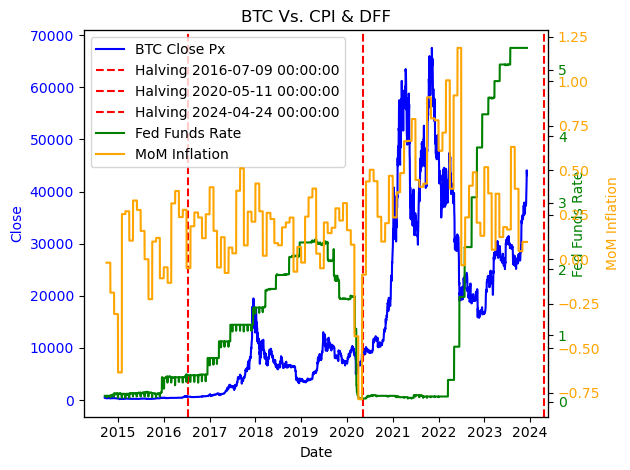

In [13]:
# Creating subplots with shared x-axis
fig, ax1 = plt.subplots()
plt.title("BTC Vs. CPI & DFF")

# Plotting 'Close' on primary y-axis
ax1.plot(btc['Date'], btc['Close'], color='blue', label='BTC Close Px',zorder = 1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating secondary y-axis
ax2 = ax1.twinx()

# Plotting 'DFF' on secondary y-axis
ax2.plot(btc['Date'], btc['DFF'], color='green', label='Fed Funds Rate',zorder = 5)
ax2.set_ylabel('Fed Funds Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Creating another secondary y-axis
ax3 = ax1.twinx()

# Plotting 'CPIAUCSL' on the second secondary y-axis
ax3.plot(btc['Date'], btc['CPI_Perc'], color='orange', label='MoM Inflation',zorder = 3)
ax3.set_ylabel('MoM Inflation', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Plot Halving Dates
for date in btc_halvings:
    ax1.axvline(x = date, color = "r", linestyle='--', label=f'Halving {date}')

# Adjusting layout to prevent overlap of secondary y-axes
fig.tight_layout()

# Displaying legends
lines = ax1.get_lines() + ax2.get_lines() + ax3.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

plt.show();

C:\ProgramData\Anaconda3\envs\my-env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


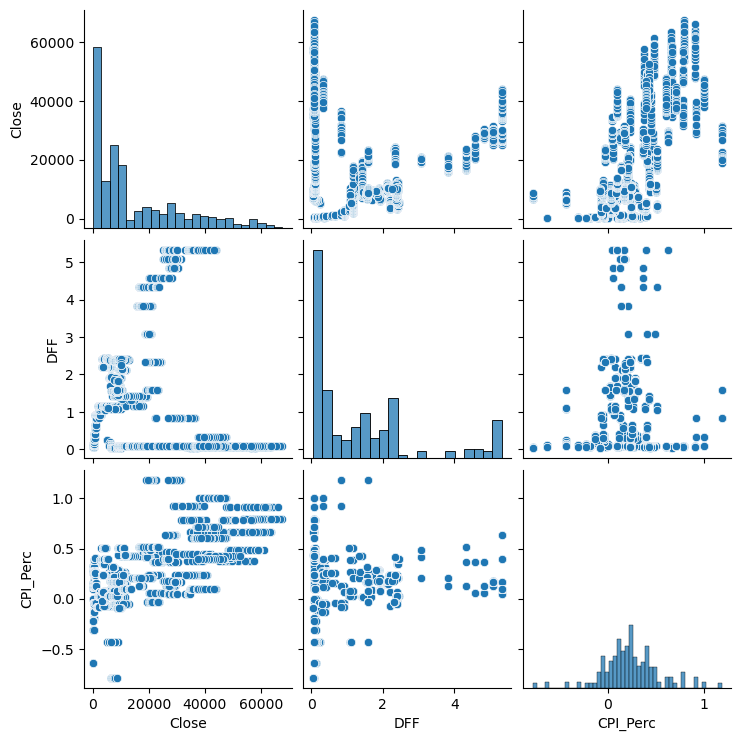

In [14]:
sns.pairplot(btc[["Close","DFF","CPI_Perc"]]);

In [15]:
btc_pred = btc[["Date","Close","DFF","CPI_Perc"]].copy()
btc_pred

,Date,Close,DFF,CPI_Perc
0,2014-09-17,457.334015,0.09,NaN
1,2014-09-18,424.440002,0.09,NaN
2,2014-09-19,394.795990,0.09,NaN
3,2014-09-20,408.903992,0.09,NaN
4,2014-09-21,398.821014,0.09,NaN
...,...,...,...,...
3364,2023-12-03,39978.390625,5.33,0.096873
3365,2023-12-04,41980.097656,5.33,0.096873
3366,2023-12-05,44080.648438,5.33,0.096873
3367,2023-12-06,43746.445313,5.33,0.096873


In [16]:
# Create a new target column shifted ‘X’ units/days up
future_days = 500
btc_pred["Prediction"] = btc_pred[["Close"]].shift(-future_days)
btc_pred

,Date,Close,DFF,CPI_Perc,Prediction
0,2014-09-17,457.334015,0.09,NaN,378.255005
1,2014-09-18,424.440002,0.09,NaN,368.766998
2,2014-09-19,394.795990,0.09,NaN,373.056000
3,2014-09-20,408.903992,0.09,NaN,374.447998
4,2014-09-21,398.821014,0.09,NaN,369.949005
...,...,...,...,...,...
3364,2023-12-03,39978.390625,5.33,0.096873,NaN
3365,2023-12-04,41980.097656,5.33,0.096873,NaN
3366,2023-12-05,44080.648438,5.33,0.096873,NaN
3367,2023-12-06,43746.445313,5.33,0.096873,NaN


In [17]:
# To create a feature dataset (x) and convert into a numpy array
x = np.array(btc_pred["Close"][0:-future_days])
x = x[:, np.newaxis]
x

array([[  457.334015],
       [  424.440002],
       [  394.79599 ],
       ...,
       [22465.478516],
       [22609.164063],
       [21361.701172]])

In [18]:
# To create a target dataset (y) and convert it to a numpy array and get all of the target values
y = np.array(btc_pred["Prediction"][0:-future_days])
y

array([  378.255005,   368.766998,   373.056   , ..., 44080.648438,
       43746.445313, 43150.523438])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# To get the last ‘x’ rows/days of the feature dataset
xfuture = btc_pred["Close"][0:-future_days]
xfuture = xfuture.tail(future_days)
xfuture = np.array(xfuture)
xfuture = xfuture[:, np.newaxis]

linerPrediction = model.predict(xfuture)
linerPrediction

array([34431.01656423, 33737.4628458 , 32524.18321074, 32844.9865468 ,
       33583.28985376, 33221.65113936, 33395.94657979, 33384.15090232,
       33101.7568043 , 32031.72136131, 32106.69580319, 31404.5975475 ,
       31022.1844815 , 32249.05636651, 32547.88065663, 32539.74512914,
       33182.79799317, 33600.01319269, 33600.42080663, 33663.66518022,
       33766.76498341, 33130.51313001, 33543.14406903, 33650.11062069,
       33340.80841907, 32574.8348261 , 33387.83478316, 33359.62147731,
       33912.89737176, 34060.03343973, 33948.71156071, 35238.78314893,
       35098.06839677, 35171.08294115, 34548.83932708, 34231.1573087 ,
       32634.6019177 , 32458.81003157, 32726.38903819, 31809.06643613,
       31042.95185349, 30804.01330963, 30431.36343517, 30057.34554097,
       31850.4001643 , 32211.82111272, 32137.34222896, 31683.63999813,
       33182.78961736, 33210.61904014, 32782.86869538, 32986.28340543,
       31604.45959508, 33066.23017879, 32699.04540189, 33042.0706773 ,
      

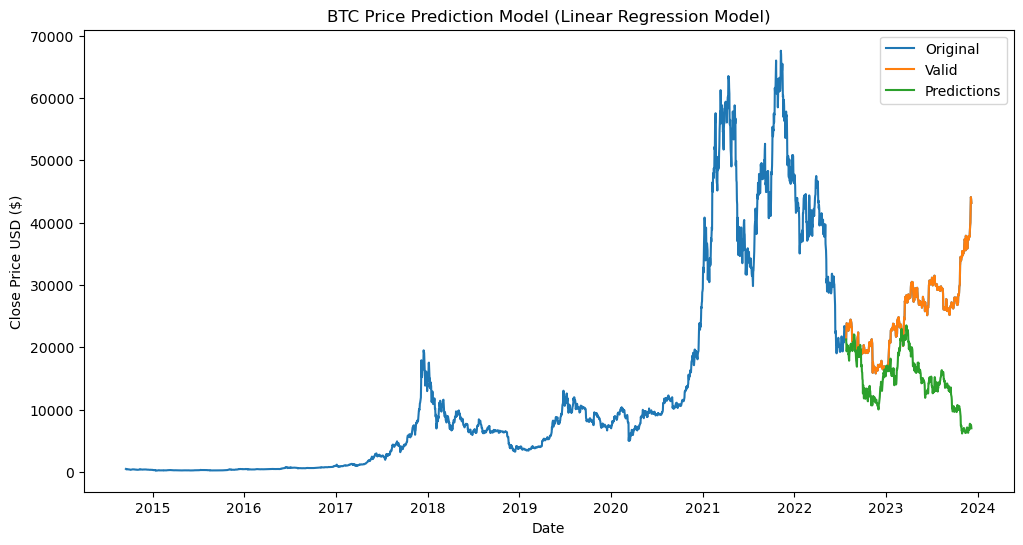

In [21]:
valid = btc_pred[x.shape[0]:].copy()
valid["Predictions"] = linerPrediction
valid["Predictions"] = valid["Predictions"] - (valid[valid["Date"] == valid["Date"].min()]["Predictions"].squeeze() - valid[valid["Date"] == valid["Date"].min()]["Close"].squeeze())

plt.figure(figsize=(12, 6))
plt.title("BTC Price Prediction Model (Linear Regression Model)")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(btc_pred["Date"], btc_pred["Close"])
plt.plot(valid["Date"],valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"]);

In [22]:
# Create new df for 2016 BTC Halving

halving1_df = btc[btc["Date"] > btc_halvings[0]][btc[btc["Date"] > btc_halvings[0]]["Date"] < btc_halvings[1]]

In [23]:
# Create new df for 2020 BTC Halving

halving2_df  = btc[btc["Date"] > btc_halvings[1]]

In [24]:
# Reset Indexes

halving1_df.reset_index(inplace = True)
halving2_df.reset_index(inplace = True)

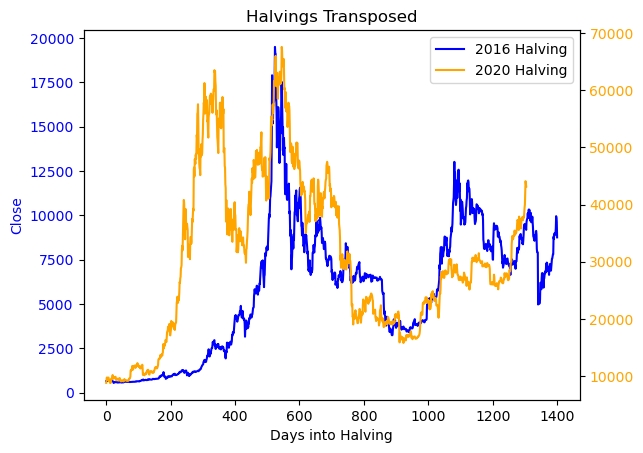

In [25]:
# Creating subplots with shared x-axis
fig, ax1 = plt.subplots()
plt.title("Halvings Transposed")

# Plotting 'Close' on primary y-axis
ax1.plot(halving1_df["Close"], color='blue', label='2016 Halving')
ax1.set_xlabel('Days into Halving')
ax1.set_ylabel('Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating secondary y-axis
ax2 = ax1.twinx()

# Plotting 'DFF' on secondary y-axis
ax2.plot(halving2_df["Close"], color='orange', label='2020 Halving')
ax2.tick_params(axis='y', labelcolor='orange')

# Displaying legends
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='upper right');

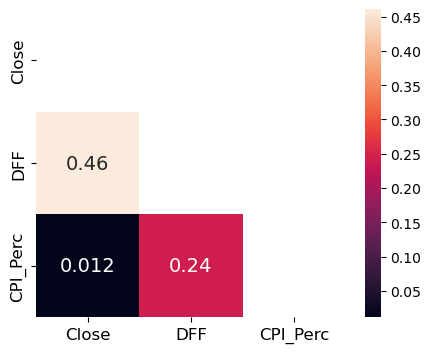

In [26]:
#Find Correlation between Close Px, DFF, & CPI For 2016 Halving

corr = halving1_df[["Close","DFF","CPI_Perc"]].corr(numeric_only = True)
mask = np.zeros_like(corr)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize = (5,4))
sns.heatmap(corr, mask = mask, annot = True, annot_kws = {"size":14})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

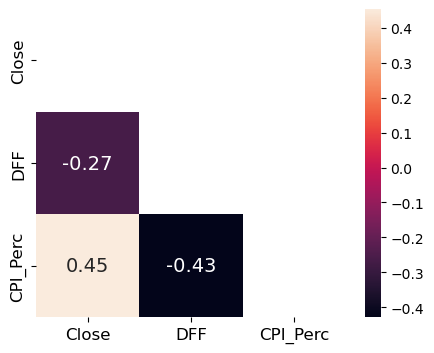

In [27]:
#Find Correlation between Close Px, DFF, & CPI For 2020 Halving

corr = halving2_df[["Close","DFF","CPI_Perc"]].corr(numeric_only = True)
mask = np.zeros_like(corr)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize = (5,4))
sns.heatmap(corr, mask = mask, annot = True, annot_kws = {"size":14})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [28]:
# Find 2016 Halving Max Price Date

halving1_max = halving1_df[halving1_df["Close"] == halving1_df["Close"].max()]

halving1_max

,index,Date,Close,DFF,CPIAUCSL,CPI_Perc
524,1186,2017-12-16,19497.400391,1.41,247.805,0.210689


In [29]:
# Find 2020 Halving Max Price Date

halving2_max= halving2_df[halving2_df["Close"] == halving2_df["Close"].max()]

halving2_max

,index,Date,Close,DFF,CPIAUCSL,CPI_Perc
545,2609,2021-11-08,67566.828125,0.08,278.711,0.791619


In [30]:
# Avg between Dates = Next BTC All Time High

timedelta(days=(halving1_max.index[0] + halving2_max.index[0]) / 2 ) + btc_halvings[2]

Timestamp('2025-10-10 12:00:00')